> 如果只是想了解神经网络的基本知识，那不必阅读本章。

# 自己的手写数字

可以使用 Photoshop，还有作者推荐免费开源的GIIMP。
将图片保存为png，且大小统一的图片

再将图片转为之前的数组来训练网络

In [1]:
# pip install imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def draw(px_arr):
    img_arr = np.asfarray(px_arr).reshape((28, 28))
    plt.imshow(img_arr, cmap='Greys', interpolation='None')

img_path = './author_img/2828_my_own_2.png'

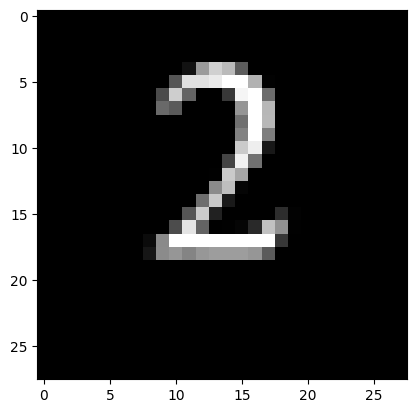

In [2]:
# 打开png图片
image = Image.open(img_path)

# 转换为灰度图像
image = image.convert('L')

# 将图像转化为一维数组
pixels = list(image.getdata())

# 输出结果
# for pixel in pixels:
#     print(pixel, end=',')

draw(pixels)

## 图片反转

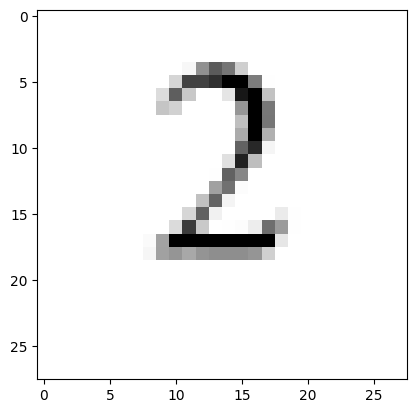

In [3]:
# 翻转颜色
inverted_pixels = [255 - pixel for pixel in pixels]

draw(inverted_pixels)

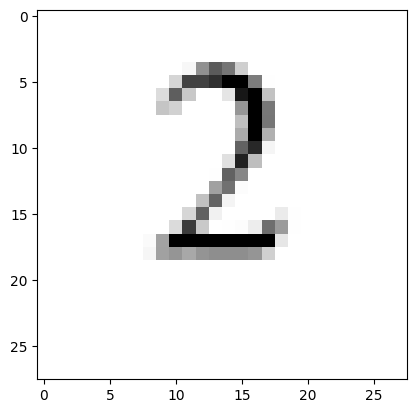

In [4]:
new_px = [-(x - 255) for x in pixels]
draw(new_px)

## 神秘的黑盒子
> 一旦神经网络得到了训练，并且在测试数据上表现良好，那么基本上就成了一个黑盒子
>
> 你不知道这个黑盒子如何计算出答案，但它确实成功算了出来

### 反向查询


In [1]:
import source as src

第1世代 <source.neuralNetwork object at 0x00000226F2AF78E0>
测试


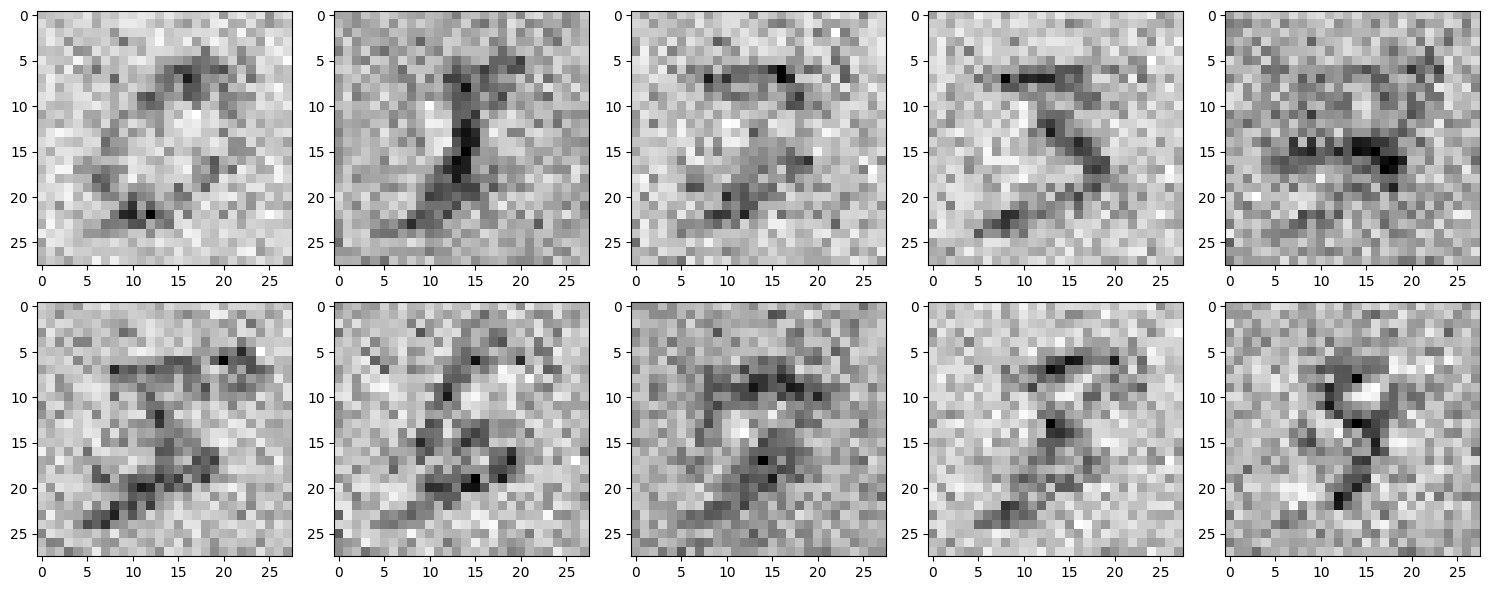

In [6]:
network_info = {
    'node_num': (784, 100, 10),
    'learning_grate': 0.3,
    'train_file': './mnist_dataset/mini/mnist_train_100.csv',
    'epochs': 1
}

example =  src.train(network_info)
target = range(10)
val = src.back_query(target, example)
src.draw(val, len(target)/2)

## 创建新的训练数据：旋转图像
> 可以利用已有的样本，通过顺逆时针旋转它们
>
> 例如旋转10度，创建新的样本

C:\Users\33 2\AppData\Local\Temp\ipykernel_2176\3533501717.py:5: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  return ndimage.interpolation.rotate(np.asfarray(px_arr).reshape(28,28), angle, cval=0.01, order=1, reshape=False)


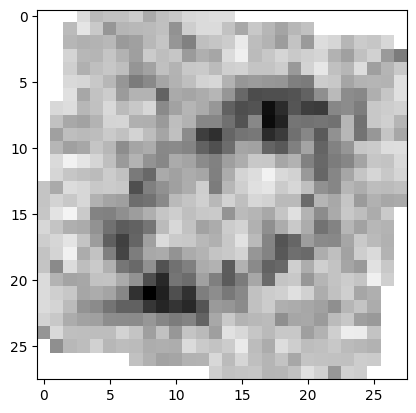

In [7]:
from scipy import ndimage
import numpy as np

def rotate_img(px_arr, angle=10):
    return ndimage.interpolation.rotate(np.asfarray(px_arr).reshape(28,28), angle, cval=0.01, order=1, reshape=False)

# draw(rotate_img(val[0]))
draw(rotate_img(val[0], -10))

In [2]:
network_info = {
    'node_num': (784, 200, 10),
    'learning_grate': 0.1,
    'train_file': './mnist_dataset/pjreddie/mnist_train.csv',
    'epochs': 1
}
n = src.train(network_info)

print(src.test(n, './mnist_dataset/pjreddie/mnist_test.csv')[0])


第1世代 <source.neuralNetwork object at 0x000001B4964C4F10>
测试
0.9606


In [3]:
network_info = {
    'node_num': (784, 200, 10),
    'learning_grate': 0.01,
    'train_file': './mnist_dataset/pjreddie/mnist_train.csv',
    'epochs': 10
}
n = src.train(network_info)

print(src.test(n, './mnist_dataset/pjreddie/mnist_test.csv')[0])

第1世代 <source.neuralNetwork object at 0x000001B4964B7760>
第2世代 <source.neuralNetwork object at 0x000001B4964B7760>
第3世代 <source.neuralNetwork object at 0x000001B4964B7760>
第4世代 <source.neuralNetwork object at 0x000001B4964B7760>
第5世代 <source.neuralNetwork object at 0x000001B4964B7760>
第6世代 <source.neuralNetwork object at 0x000001B4964B7760>
第7世代 <source.neuralNetwork object at 0x000001B4964B7760>
第8世代 <source.neuralNetwork object at 0x000001B4964B7760>
第9世代 <source.neuralNetwork object at 0x000001B4964B7760>
第10世代 <source.neuralNetwork object at 0x000001B4964B7760>
测试
0.9763
